In [2]:
import matplotlib.pyplot as plt

import matplotlib.cm as cmap
import numpy as np

$$
r(t) = 1 - \int\limits_{-H}^{H} \frac{n(z,t)}{n_0}\;\text{d}z
$$

$$
n(z,t) = \frac{n_0}{\sqrt{2\pi\sigma(t)}^2} \exp\left( -\frac{1}{2}\frac{z^2}{\sigma(t)^2} \right)
$$

$$
\sigma(t) = \sqrt{\frac{2}{3} \frac{E_p}{m_p c^2} \lambda t}
$$

In [3]:
from Binaries import *
from scipy.special import erf

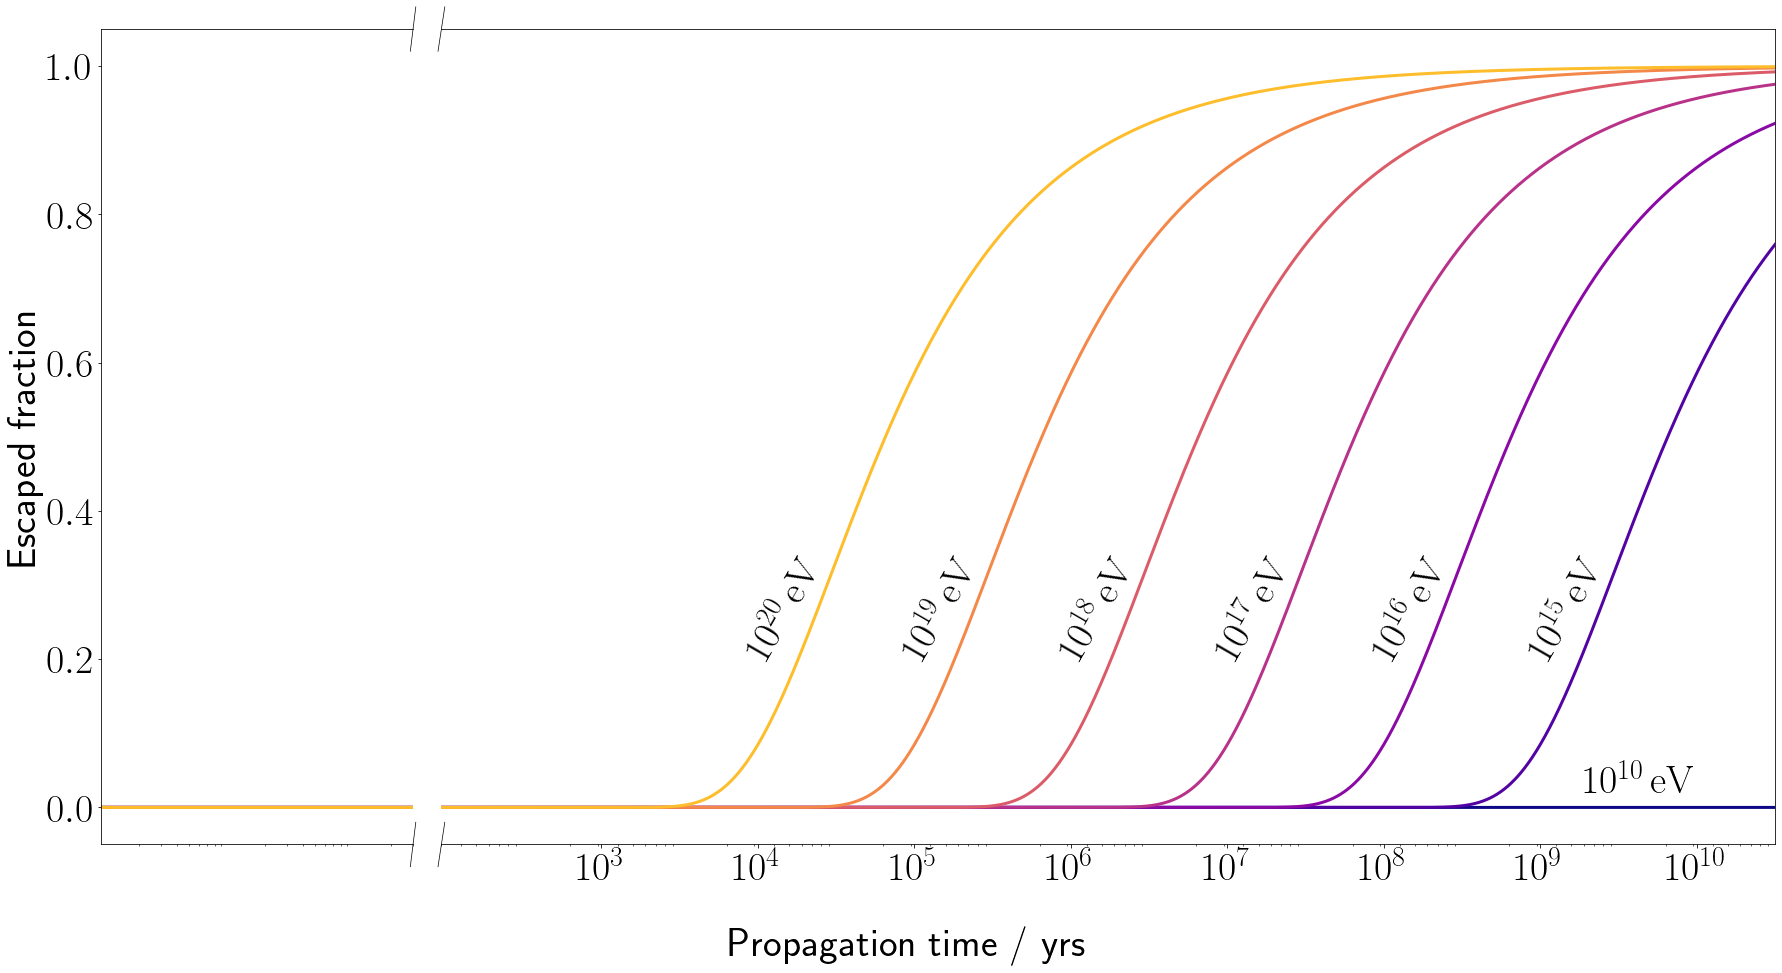

In [4]:
mp = 938.27e6           # eV
lm = 3e-15              # pc²/s

energies = [1e10, 1e15, 1e16, 1e17, 1e18, 1e19, 1e20]
colormap = cmap.get_cmap("plasma")
t = np.geomspace(1e0, 1e20, 10000)

ax1 = plt.subplot2grid((1, 10), (0, 0), colspan = 2)
ax2 = plt.subplot2grid((1, 10), (0, 2), colspan = 8)
xs = [2.5e10, 2.5e11, 2.5e12, 2.5e13, 2.5e14, 2.5e15, 2.5e16, 2.5e17]

for i, energy in enumerate(energies):

    c = colormap(i / len(energies))
    sigma = np.sqrt(2/3 * energy/mp * lm * t)
    r_t = 1 - erf(10e3 / sigma)

    x = xs[::-1][i] if i != 0 else 6e16
    y = 0.2 if i != 0 else 0.02
    rotation = 60 if i != 0 else 0

    ax2.text(x, y, f"$10^{{{len(str(int(energy))) - 1}}}\,\mathrm{{eV}}$", rotation = rotation)
    ax1.plot(t, r_t, lw = 3, label = f"$E = {energy:.1e}$ eV", c = c)
    ax2.plot(t, r_t, lw = 3, label = f"$E = {energy:.1e}$ eV", c = c)

cut = [3e2, 3e9]
ax1.set_xlim(1, cut[0])
ax2.set_xlim(cut[1], 1e18)
ax1.set_ylim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([])
ax1.set_xticks([])
ax2.set_xticks([])

kwargs = dict(color='k', clip_on=False, lw = 0.7)
ax1.plot((0.95 * cut[0], 1.05 * cut[0]), (1.02, 1.08), **kwargs)
ax2.plot((0.95 * cut[1], 1.05 * cut[1]), (1.02, 1.08), **kwargs)

ax1.plot((0.95 * cut[0], 1.05 * cut[0]), (-0.08, -0.02), **kwargs)
ax2.plot((0.95 * cut[1], 1.05 * cut[1]), (-0.08, -0.02), **kwargs)


ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xticks([])
ax2.set_xticks([3.154e10, 3.154e11, 3.154e12, 3.154e13, 3.154e14, 3.154e15, 3.154e16, 3.154e17])
ax2.set_xticklabels(["$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$", "$10^8$", "$10^9$", "$10^{10}$"])

ax1.set_ylabel("Escaped fraction")
ax2.set_xlabel("Propagation time / yrs")
ax2.xaxis.set_label_coords(.35, -.1)

plt.savefig("../plots/galactic_diffusion.png")

In [5]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["font.size"] = 30

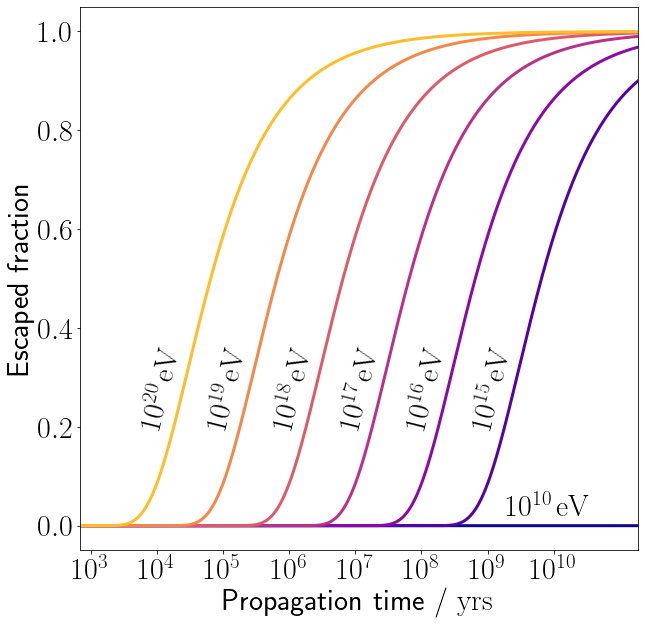

In [7]:
mp = 938.27e6           # eV
lm = 3e-15              # pc²/s

energies = [1e10, 1e15, 1e16, 1e17, 1e18, 1e19, 1e20]
colormap = cmap.get_cmap("plasma")
t = np.geomspace(1e0, 1e20, 10000)

ax1 = plt.gca()
xs = [0, 1.7e11, 1.7e12, 1.7e13, 1.7e14, 1.7e15, 1.7e16, 1.7e17]

for i, energy in enumerate(energies):

    c = colormap(i / len(energies))
    sigma = np.sqrt(2/3 * energy/mp * lm * t)
    r_t = 1 - erf(10e3 / sigma)

    x = xs[::-1][i] if i != 0 else 6e16
    y = 0.2 if i != 0 else 0.02
    rotation = 76 if i != 0 else 0

    ax1.text(x, y, f"$10^{{{len(str(int(energy))) - 1}}}\,\mathrm{{eV}}$", rotation = rotation)
    ax1.plot(t, r_t, lw = 3, label = f"$E = {energy:.1e}$ eV", c = c)
    # ax2.plot(t, r_t, lw = 3, label = f"$E = {energy:.1e}$ eV", c = c)

# cut = [3e2, 3e9]
# ax1.set_xlim(1, cut[0])
ax1.set_xlim(0.7 * 3.154e10, 6e18)
# ax1.set_ylim(-0.05, 1.05)
# ax2.set_ylim(-0.05, 1.05)

# ax1.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# ax2.set_yticks([])
# ax1.set_xticks([])
# ax2.set_xticks([])

ax1.set_xscale("log")

ax1.set_xticks([3.154e10, 3.154e11, 3.154e12, 3.154e13, 3.154e14, 3.154e15, 3.154e16, 3.154e17])
ax1.set_xticklabels(["$10^3$", "$10^4$", "$10^5$", "$10^6$", "$10^7$", "$10^8$", "$10^9$", "$10^{10}$"])

ax1.set_ylabel("Escaped fraction")
ax1.set_xlabel("Propagation time / $\mathrm{yrs}$")
# ax1.xaxis.set_label_coords(.35, -.1)

plt.savefig("../plots/galactic_diffusion.png")